# Scikit-Learn: First Steps

This is one of the notebooks for the O'Reilly Live Training - Scikit-Learn: First Steps by Pratheerth Padman

### The Dataset

The dataset we're going to be using throughout the session, can be found at - https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

#### First look at the dataset!

Here, we'll be using pandas to read the downloaded csv file. We'll then print the number of rows and columns in the dataset using the shape function.

Then we'll get our first look at the dataset using the head function which by default prints out the first 5 rows of the dataset. If we want to print out the last 5 rows, we can use the tail function. We can also specify the number of rows we want to be printed out in the head or tail functions.

In [2]:
# importing the dataset

data_df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")

In [3]:
# shape of the dataset

print("The dataset has {} rows and {} columns".format(data_df.shape[0], data_df.shape[1]))

The dataset has 5110 rows and 12 columns


In [4]:
# first and last few rows of the dataset

data_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Attribute Information

> 1) **id:** unique identifier

> 2) **gender:** "Male", "Female" or "Other"

> 3) **age:** age of the patient

> 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

> 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

> 6) **ever_married:** "No" or "Yes"

> 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

> 8) **Residence_type:** "Rural" or "Urban"

> 9) **avg_glucose_level:** average glucose level in blood

> 10) **bmi:** body mass index

> 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

> 12) **stroke:** 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### The Info Function

The info function helps us to identify the number of columns, if there are any missing values and also the type of features/variables that are in the dataset.
Here "object" means its a categorical feature and both "int64" and "float64" means it is numerical.

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Describe Function

The data describe function helps to print out some basic summary statistics like count, mean, standard deviation, max value, min value and the 25th, 50th and 75th percentile of each of the variables. It works for both numerical and categorical features, but in different ways.

In [6]:
data_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Dealing with Missing Values

In [7]:
data_df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data_df.bmi.mean()

28.893236911794673

In [9]:
data_df.bmi.median()

28.1

In [10]:
data_df[data_df["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [11]:
# create a missing indicator feature for bmi

data_df["bmi_nan"] = np.where(data_df["bmi"].isnull(), 1, 0)

In [12]:
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_nan
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [13]:
# fill missing bmi values with mean

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean")

imp.fit(data_df[["bmi"]])

data_df[["bmi"]] = imp.transform(data_df[["bmi"]])

In [14]:
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_nan
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0


### Dealing with Categorical Features

In [15]:
# print out the categorical data in the dataset

data_df.select_dtypes(include=["object"]).head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [16]:
# occurences of each unique value in a categorical feature

categ_df = data_df.select_dtypes(include=["object"])

for i in categ_df.columns:
    print(categ_df[i].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [17]:
data_df[data_df["gender"] == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_nan
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,0


In [18]:
# drop that row
data_df = data_df.drop(data_df.index[3116])

There are 5 categorical features in the dataset. 3 of them - gender, ever_married and residence_type contain just two types of values - these can be label encoded. The other two - smoking_status and work_type contain more than 2 values within, and needs to be one hot encoded.

In [19]:
# Label encoding variables with just 2 values

# import label encoder
from sklearn.preprocessing import LabelEncoder

# create label encoder instance
le = LabelEncoder()

# fit label encoder to relevat features

data_df["gender"] = le.fit_transform(data_df["gender"])

data_df["ever_married"] = le.fit_transform(data_df["ever_married"])

data_df["Residence_type"] = le.fit_transform(data_df["Residence_type"])

In [20]:
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_nan
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,0
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,0
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,0
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,0


In [21]:
# One-Hot encoding the other categorical variables

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# creating a one-hot-encded array of values for the work_type feature
work_ohe = ohe.fit_transform(data_df.work_type.values.reshape(-1,1)).toarray()

print(work_ohe)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [22]:
# creating a dataframe

df_work_ohe = pd.DataFrame(work_ohe, columns = ["Work_"+str(int(i)) for i in range(work_ohe.shape[1])])

df_work_ohe

,Work_0,Work_1,Work_2,Work_3,Work_4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
5104,0.0,0.0,1.0,0.0,0.0
5105,0.0,0.0,0.0,1.0,0.0
5106,0.0,0.0,0.0,1.0,0.0
5107,0.0,0.0,1.0,0.0,0.0


In [23]:
# reset indexes to avoid creation of null values

data_df.reset_index(drop=True, inplace=True)
df_work_ohe.reset_index(drop=True, inplace=True)

In [24]:
# concatenating the work_ohe dataframe with our original

data_df = pd.concat([data_df, df_work_ohe], axis=1)

# dropping the work_type feature from our original dataframe
data_df = data_df.drop(["work_type"], axis=1)

data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_nan,Work_0,Work_1,Work_2,Work_3,Work_4
0,9046,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0,0.0,0.0,1.0,0.0,0.0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,never smoked,1,1,0.0,0.0,0.0,1.0,0.0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0,0.0,0.0,1.0,0.0,0.0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,0,0.0,0.0,1.0,0.0,0.0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0,0.0,0.0,0.0,1.0,0.0


In [25]:
data_df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_nan,Work_0,Work_1,Work_2,Work_3,Work_4
0,9046,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0,0.0,0.0,1.0,0.0,0.0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,never smoked,1,1,0.0,0.0,0.0,1.0,0.0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0,0.0,0.0,1.0,0.0,0.0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,0,0.0,0.0,1.0,0.0,0.0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,0,80.0,1,0,1,1,83.75,28.893237,never smoked,0,1,0.0,0.0,1.0,0.0,0.0
5105,44873,0,81.0,0,0,1,1,125.20,40.000000,never smoked,0,0,0.0,0.0,0.0,1.0,0.0
5106,19723,0,35.0,0,0,1,0,82.99,30.600000,never smoked,0,0,0.0,0.0,0.0,1.0,0.0
5107,37544,1,51.0,0,0,1,0,166.29,25.600000,formerly smoked,0,0,0.0,0.0,1.0,0.0,0.0


In [26]:
# one-hot encoding the smoking_status feature

smoking_ohe = ohe.fit_transform(data_df.smoking_status.values.reshape(-1,1)).toarray()

df_smoking_ohe = pd.DataFrame(smoking_ohe, columns = ["Smoke_"+str(int(i)) for i in range(smoking_ohe.shape[1])])

data_df = pd.concat([data_df, df_smoking_ohe], axis=1)

data_df = data_df.drop(["smoking_status"], axis=1)

data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,bmi_nan,Work_0,Work_1,Work_2,Work_3,Work_4,Smoke_0,Smoke_1,Smoke_2,Smoke_3
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

columns = ['avg_glucose_level','bmi','age']

scaled = std.fit_transform(data_df[['avg_glucose_level','bmi','age']])

scaled = pd.DataFrame(scaled,columns=columns)

data_df=data_df.drop(columns=columns,axis=1)

In [28]:
data_df = pd.concat([data_df, scaled], axis=1)

data_df.head()

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,bmi_nan,Work_0,Work_1,Work_2,Work_3,Work_4,Smoke_0,Smoke_1,Smoke_2,Smoke_3,avg_glucose_level,bmi,age
0,9046,1,0,1,1,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.706450,1.001041,1.051242
1,51676,0,0,0,1,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.121652,-0.000165,0.785889
2,31112,1,0,1,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.004867,0.468399,1.626174
3,60182,0,0,0,1,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.437473,0.715233,0.255182
4,1665,0,1,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.501297,-0.635858,1.581949


### Feature Engineering

In [29]:
# drop id column

data_df = data_df.drop("id", axis=1)

data_df.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,bmi_nan,Work_0,Work_1,Work_2,Work_3,Work_4,Smoke_0,Smoke_1,Smoke_2,Smoke_3,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.706450,1.001041,1.051242
1,0,0,0,1,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.121652,-0.000165,0.785889
2,1,0,1,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.004867,0.468399,1.626174
3,0,0,0,1,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.437473,0.715233,0.255182
4,0,1,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.501297,-0.635858,1.581949


### Train-Test Split

In [30]:
# splitting the data to X and y

y = data_df["stroke"]

X = data_df.drop("stroke", axis=1)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Dealing with Data Imbalance

SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [32]:
!pip install imbalanced-learn

     |████████████████████████████████| 189 kB 489 kB/s eta 0:00:01


In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
# Counts of 1 and 0 before oversampling

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 160
Before OverSampling, counts of label 0: 3416 



In [35]:
# instantiating SMOTE
sm = SMOTE(random_state=2)

X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train: {}'.format(y_train_sm.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_sm == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_sm == 0)))

After OverSampling, the shape of X_train: (6832, 18)
After OverSampling, the shape of y_train: (6832,)
After OverSampling, counts of label 1: 3416
After OverSampling, counts of label 0: 3416


### Building Our Classification Models

Here, we'll be using 3 models - logistic regression, k-nn, random forest and training them on our data. We'll then see how they perform on our testing data.

In [36]:
# importing all the required models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# instantiating the models

lr_clf = LogisticRegression(random_state=7)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=7)

In [37]:
# importing the evaluation metric

from sklearn.metrics import fbeta_score, confusion_matrix, recall_score

#### Logistic Regression

In [38]:
# fit the model
lr_clf.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=7)

In [39]:
# predict
y_pred = lr_clf.predict(X_test)

In [40]:
# printing out the scores
print("The Fbeta Score is - ",fbeta_score(y_test, y_pred, beta=2.0), "\n")
print("The Recall Score is - ", recall_score(y_test, y_pred))

The Fbeta Score is -  0.41888297872340413 

The Recall Score is -  0.7078651685393258


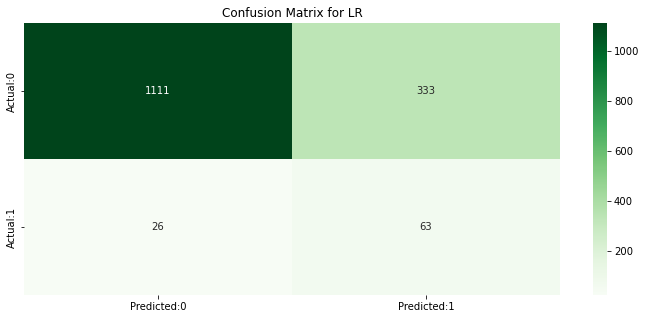

In [41]:
# plotting the confusion matrix to get a better perspective

plt.figure(figsize=(12,5))

cm_lr = confusion_matrix(y_test,y_pred)

conf_matrix_lr = pd.DataFrame(data=cm_lr,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix_lr, annot=True,fmt='d',cmap="Greens")

plt.title("Confusion Matrix for LR")
plt.show()

#### KNN

In [42]:
knn_clf.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [43]:
y_pred = knn_clf.predict(X_test)

In [44]:
print("The Fbeta Score is - ",fbeta_score(y_test, y_pred, beta=2.0), "\n")
print("The Recall Score is - ", recall_score(y_test, y_pred))

The Fbeta Score is -  0.2848101265822785 

The Recall Score is -  0.4044943820224719


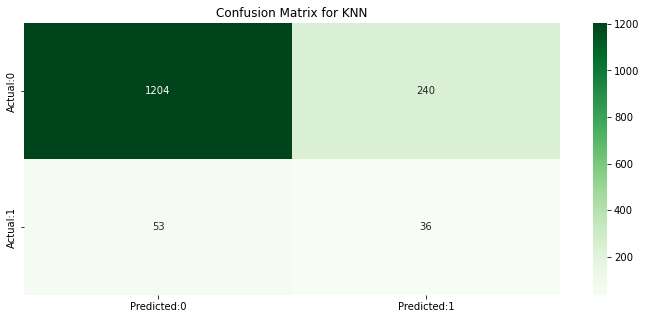

In [45]:
plt.figure(figsize=(12,5))

cm_knn = confusion_matrix(y_test,y_pred)

conf_matrix_knn = pd.DataFrame(data=cm_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix_knn, annot=True,fmt='d',cmap="Greens")

plt.title("Confusion Matrix for KNN")
plt.show()

#### Random Forest

In [46]:
rf_clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=7)

In [47]:
y_pred = rf_clf.predict(X_test)

In [48]:
print("The Fbeta Score is - ",fbeta_score(y_test, y_pred, beta=2.0), "\n")
print("The Recall Score is - ", recall_score(y_test, y_pred))

The Fbeta Score is -  0.1872246696035242 

The Recall Score is -  0.19101123595505617


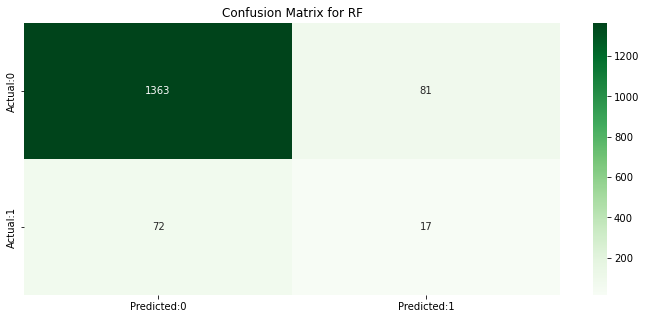

In [49]:
plt.figure(figsize=(12,5))

cm_rf = confusion_matrix(y_test,y_pred)

conf_matrix_rf = pd.DataFrame(data=cm_rf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix_rf, annot=True,fmt='d',cmap="Greens")

plt.title("Confusion Matrix for RF")
plt.show()

### HyperParameter Tuning

**What are Hyperparameters?** - A hyperparameter is a configuration that is external to the model and is set before the learning process begins. These are tunable and can directly affect how well a model trains.

**What is GridSearch?** - Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model.

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# scoring parameters

from sklearn.metrics import make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

#### Logistic Regression - After tuning

In [52]:
# specify the parameters to tune and their values to be checked

param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2']}

lr_clf_gs = GridSearchCV(estimator=LogisticRegression(random_state=13), param_grid=param_grid_lr,
                         scoring=ftwo_scorer, n_jobs=-1)

# fit the model
lr_clf_gs.fit(X_train_sm, y_train_sm)

# print out the best parameters
print(lr_clf_gs.best_params_, "\n") 

# predict on our test data
grid_predictions_lr = lr_clf_gs.predict(X_test) 

print("The Fbeta Score is - ",fbeta_score(y_test, grid_predictions_lr, beta=2.0), "\n")
print("The Recall Score is - ",recall_score(y_test, grid_predictions_lr))

/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/iaquin

{'C': 0.01, 'penalty': 'l2'} 

The Fbeta Score is -  0.40973111395646605 

The Recall Score is -  0.7191011235955056


/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/iaquine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/iaquin

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

cm_tuning = confusion_matrix(y_test,grid_predictions_lr)

conf_matrix_t = pd.DataFrame(data=cm_tuning,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix_lr, ax=ax[0], annot=True,fmt='d',cmap="Blues").set_title("CM for LR - Before Tuning")
sns.heatmap(conf_matrix_t, ax=ax[1], annot=True,fmt='d',cmap="Reds").set_title("CM for KR - After Tuning")

plt.show()

### KNN - After tuning

In [54]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 13],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}

knn_clf_gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn,
                          scoring=ftwo_scorer, n_jobs=-1)

knn_clf_gs.fit(X_train_sm, y_train_sm)

print(knn_clf_gs.best_params_, "\n") 

grid_predictions_knn = knn_clf_gs.predict(X_test) 

print("The Fbeta Score is - ",fbeta_score(y_test, grid_predictions_knn, beta=2.0), "\n")
print("The Recall Score is - ",recall_score(y_test, grid_predictions_knn))

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'} 

The Fbeta Score is -  0.19677996422182467 

The Recall Score is -  0.24719101123595505


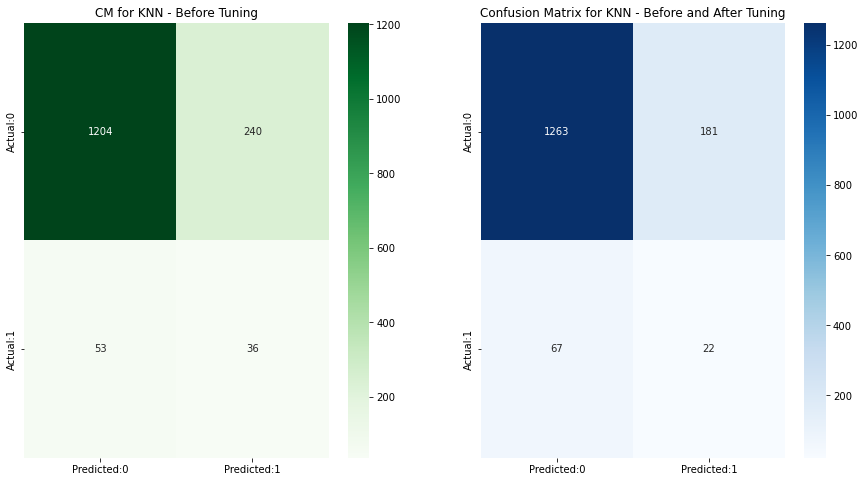

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))


cm_tuning = confusion_matrix(y_test,grid_predictions_knn)

conf_matrix_t = pd.DataFrame(data=cm_tuning,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix_knn, ax=ax[0], annot=True,fmt='d',cmap="Greens").set_title("CM for KNN - Before Tuning")
sns.heatmap(conf_matrix_t, ax=ax[1], annot=True,fmt='d',cmap="Blues").set_title("CM for KNN - After Tuning")

plt.title("Confusion Matrix for KNN - Before and After Tuning")
plt.show()

### RF - After tunings

In [56]:
param_grid_rf = {'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

rf_clf_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=7), param_grid=param_grid_rf,
                          scoring=ftwo_scorer, n_jobs=-1)

rf_clf_gs.fit(X_train_sm, y_train_sm)

print(rf_clf_gs.best_params_, "\n") 

grid_predictions_rf = rf_clf_gs.predict(X_test) 

print("The Fbeta Score is - ",fbeta_score(y_test, grid_predictions_rf, beta=2.0), "\n")
print("The Recall Score is - ",recall_score(y_test, grid_predictions_rf))

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500} 

The Fbeta Score is -  0.3937592867756315 

The Recall Score is -  0.5955056179775281


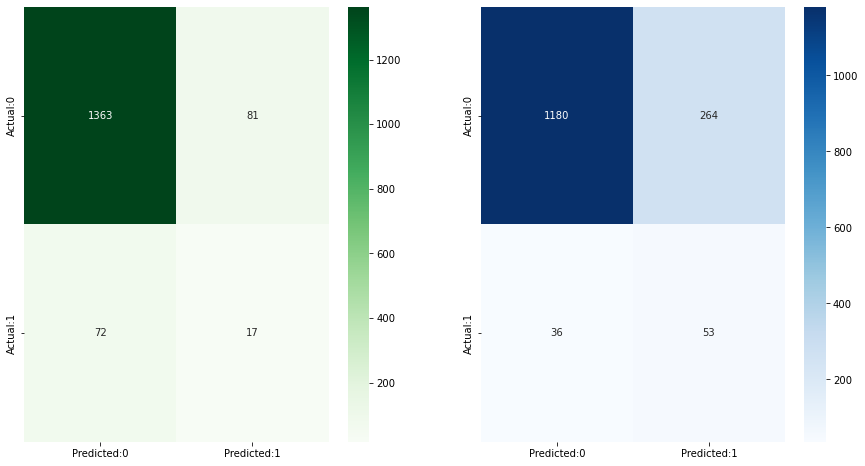

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))

cm_tuning = confusion_matrix(y_test,grid_predictions_rf)

conf_matrix_t = pd.DataFrame(data=cm_tuning,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

sns.heatmap(conf_matrix_rf, ax=ax[0], annot=True,fmt='d',cmap="Greens")
sns.heatmap(conf_matrix_t, ax=ax[1], annot=True,fmt='d',cmap="Blues")


plt.show()

#### Conclusion

When we compared these 3 algorithms for this particular dataset, a hyperparameter tuned Logistic Regression seems to be best choice.

### Exercise

Print out the fbeta and recall score for the following models:
1. Support Vector Machine Classifier
2. Naive Bayes
3. Decision Tree Classifier

In [58]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid_svc = {'C': [0.001,0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}

svc_clf_gs = GridSearchCV(estimator=SVC(), param_grid=param_grid_svc,
                          scoring=ftwo_scorer, n_jobs=-1)

svc_clf_gs.fit(X_train_sm, y_train_sm)

print(svc_clf_gs.best_params_, "\n") 

grid_predictions_svc = svc_clf_gs.predict(X_test)

print("The Fbeta Score is - ",fbeta_score(y_test, grid_predictions_svc, beta=2.0), "\n")
print("The Recall Score is - ",recall_score(y_test, grid_predictions_svc))

In [ ]:
# decision tree

param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,9),
                'min_samples_split': range(1,9), 'min_samples_leaf': range(1,9)}

dt_clf_gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt,
                          scoring=ftwo_scorer, n_jobs=-1)

dt_clf_gs.fit(X_train_sm, y_train_sm)

print(dt_clf_gs.best_params_, "\n") 

grid_predictions_dt = dt_clf_gs.predict(X_test) 

print("The Fbeta Score is - ",fbeta_score(y_test, grid_predictions_dt, beta=2.0), "\n")
print("The Recall Score is - ",recall_score(y_test, grid_predictions_dt))

In [ ]:
# naive bayes - no hyperparameters to tune

gnb = GaussianNB()

gnb.fit(X_train_sm, y_train_sm)

y_pred = gnb.predict(X_test)

print("The Fbeta Score is - ",fbeta_score(y_test, y_pred, beta=2.0), "\n")
print("The Recall Score is - ", recall_score(y_test, y_pred))